Project 1 : Customer Service Requests Analysis

In [2]:
#import Libraries

import pandas as pd
import numpy as np
import scipy
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt


In [4]:
#import dataset(Import a 311 NYC service request.)

data=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\HOME\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
nyc=pd.DataFrame(data)

In [6]:
nyc.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [7]:
nyc.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [17]:
nyc.tail(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"
300697,30281825,03/29/2015 12:33:01 AM,03/29/2015 04:41:50 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"


In [18]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     300698 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [19]:
nyc.shape

(300698, 53)

In [20]:
nyc['Closed Date'].fillna(method='ffill',inplace=True)

In [26]:
nyc['Closed Date']

0        2016-01-01 00:55:00
1        2016-01-01 01:26:00
2        2016-01-01 04:51:00
3        2016-01-01 07:43:00
4        2016-01-01 03:24:00
                 ...        
300693   2015-03-29 01:13:01
300694   2015-03-29 02:33:59
300695   2015-03-29 03:40:20
300696   2015-03-29 04:38:35
300697   2015-03-29 04:41:50
Name: Closed Date, Length: 300698, dtype: datetime64[ns]

Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype

In [23]:
nyc['Created Date']=pd.to_datetime(nyc['Created Date'])

In [24]:
nyc['Closed Date']=pd.to_datetime(nyc['Closed Date'])

In [25]:
nyc[['Created Date','Closed Date']]

,Created Date,Closed Date
0,2015-12-31 23:59:45,2016-01-01 00:55:00
1,2015-12-31 23:59:44,2016-01-01 01:26:00
2,2015-12-31 23:59:29,2016-01-01 04:51:00
3,2015-12-31 23:57:46,2016-01-01 07:43:00
4,2015-12-31 23:56:58,2016-01-01 03:24:00
...,...,...
300693,2015-03-29 00:33:41,2015-03-29 01:13:01
300694,2015-03-29 00:33:28,2015-03-29 02:33:59
300695,2015-03-29 00:33:03,2015-03-29 03:40:20
300696,2015-03-29 00:33:02,2015-03-29 04:38:35


In [27]:
nyc.fillna(0,inplace=True)

In [28]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     300698 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      300698 non-null  object        
 7   Location Type                   300698 non-null  object        
 8   Incident Zip                    300698 non-null  float64       
 9   Incident Address                300698 non-null  object        
 10  Street Name                     300698 non-null  object 

create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [29]:
nyc['Request_Closing_Time'] = (nyc['Closed Date']-nyc['Created Date'])

In [30]:
nyc['Request_Closing_Time']

0        00:55:15
1        01:26:16
2        04:51:31
3        07:45:14
4        03:27:02
           ...   
300693   00:39:20
300694   02:00:31
300695   03:07:17
300696   04:05:33
300697   04:08:49
Name: Request_Closing_Time, Length: 300698, dtype: timedelta64[ns]

In [31]:
nyc.shape

(300698, 54)

In [32]:
nyc.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [33]:
nyc.dtypes

Unique Key                                  int64
Created Date                       datetime64[ns]
Closed Date                        datetime64[ns]
Agency                                     object
Agency Name                                object
Complaint Type                             object
Descriptor                                 object
Location Type                              object
Incident Zip                              float64
Incident Address                           object
Street Name                                object
Cross Street 1                             object
Cross Street 2                             object
Intersection Street 1                      object
Intersection Street 2                      object
Address Type                               object
City                                       object
Landmark                                   object
Facility Type                              object
Status                                     object


Provide major insights/patterns that you can offer in a visual format (graphs or tables); 
at least 4 major conclusions that you can come up with after generic data mining.

1. To find the data of various complaints using bar graphs

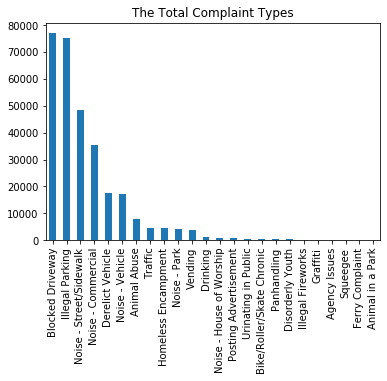

In [34]:
nyc['Complaint Type'].value_counts().plot.bar()
plt.title("The Total Complaint Types")
plt.show()

2 To find the Complaint resolution status

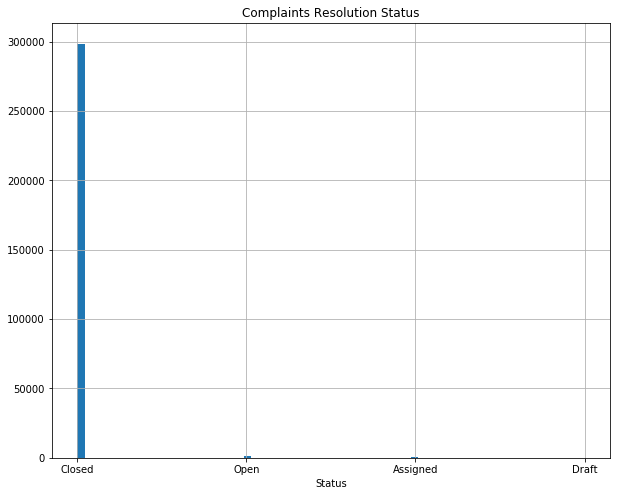

In [35]:
plt.figure(figsize=(10,8))
nyc['Status'].hist(bins=70)
plt.title("Complaints Resolution Status")
plt.xlabel("Status")
plt.show()

3 The Agency Names which work on different complaints

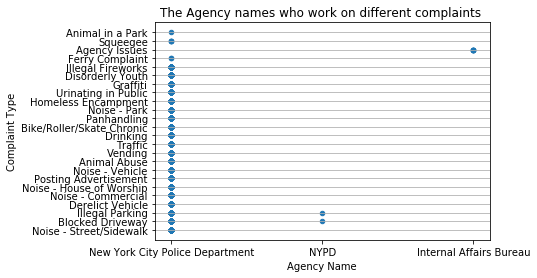

In [36]:
nyc.plot.scatter(x='Agency Name', y ='Complaint Type')
plt.title("The Agency names who work on different complaints ")
plt.grid(b=True, which='major',axis='y')
plt.show()

4 The relation between the time where complaints created and closed

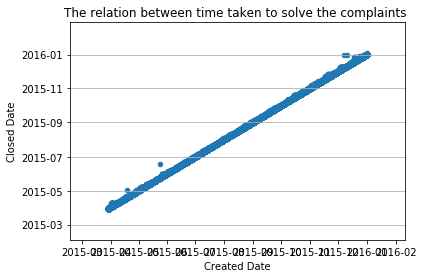

In [37]:
nyc.plot.scatter(x='Created Date', y ='Closed Date')
plt.title("The relation between time taken to solve the complaints ")
plt.grid(b=True, which='major',axis='y')
plt.show()

5 To find the correlation of the dataset and to plot a heatmap

In [38]:
Data=nyc.corr()

In [39]:
Data

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
Unique Key,1.000000,0.021146,0.010161,-0.018534,NaN,NaN,NaN,NaN,NaN,0.011585,-0.012271
Incident Zip,0.021146,1.000000,0.767150,0.242357,NaN,NaN,NaN,NaN,NaN,0.738355,-0.741140
X Coordinate (State Plane),0.010161,0.767150,1.000000,0.640620,NaN,NaN,NaN,NaN,NaN,0.981824,-0.978710
Y Coordinate (State Plane),-0.018534,0.242357,0.640620,1.000000,NaN,NaN,NaN,NaN,NaN,0.609595,-0.591878
School or Citywide Complaint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taxi Company Borough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taxi Pick Up Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Garage Lot Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,0.011585,0.738355,0.981824,0.609595,NaN,NaN,NaN,NaN,NaN,1.000000,-0.999714


In [40]:
Data.fillna(0)

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
Unique Key,1.000000,0.021146,0.010161,-0.018534,0.0,0.0,0.0,0.0,0.0,0.011585,-0.012271
Incident Zip,0.021146,1.000000,0.767150,0.242357,0.0,0.0,0.0,0.0,0.0,0.738355,-0.741140
X Coordinate (State Plane),0.010161,0.767150,1.000000,0.640620,0.0,0.0,0.0,0.0,0.0,0.981824,-0.978710
Y Coordinate (State Plane),-0.018534,0.242357,0.640620,1.000000,0.0,0.0,0.0,0.0,0.0,0.609595,-0.591878
School or Citywide Complaint,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Vehicle Type,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Taxi Company Borough,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Taxi Pick Up Location,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Garage Lot Name,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
Latitude,0.011585,0.738355,0.981824,0.609595,0.0,0.0,0.0,0.0,0.0,1.000000,-0.999714


5 To display the heatmap for correlation of the dataset

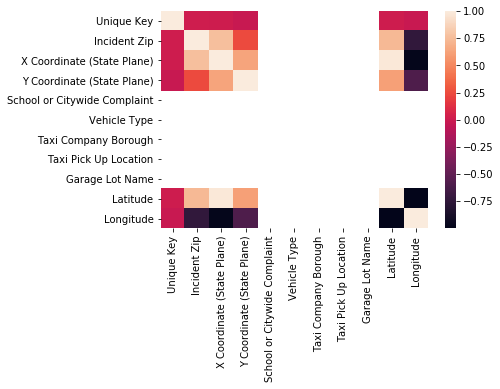

In [41]:
sns.heatmap(Data)

Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [42]:
nyc['Request_Closing_Time']

0        00:55:15
1        01:26:16
2        04:51:31
3        07:45:14
4        03:27:02
           ...   
300693   00:39:20
300694   02:00:31
300695   03:07:17
300696   04:05:33
300697   04:08:49
Name: Request_Closing_Time, Length: 300698, dtype: timedelta64[ns]

In [43]:
nyc['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [44]:
nyc['Location Type'].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge', 'Terminal', 0, 'Ferry',
       'Park'], dtype=object)

In [45]:
newnyc=nyc[['Created Date','Closed Date','Request_Closing_Time','Complaint Type','Location Type']]

In [46]:
newnyc

,Created Date,Closed Date,Request_Closing_Time,Complaint Type,Location Type
0,2015-12-31 23:59:45,2016-01-01 00:55:00,00:55:15,Noise - Street/Sidewalk,Street/Sidewalk
1,2015-12-31 23:59:44,2016-01-01 01:26:00,01:26:16,Blocked Driveway,Street/Sidewalk
2,2015-12-31 23:59:29,2016-01-01 04:51:00,04:51:31,Blocked Driveway,Street/Sidewalk
3,2015-12-31 23:57:46,2016-01-01 07:43:00,07:45:14,Illegal Parking,Street/Sidewalk
4,2015-12-31 23:56:58,2016-01-01 03:24:00,03:27:02,Illegal Parking,Street/Sidewalk
...,...,...,...,...,...
300693,2015-03-29 00:33:41,2015-03-29 01:13:01,00:39:20,Noise - Commercial,Club/Bar/Restaurant
300694,2015-03-29 00:33:28,2015-03-29 02:33:59,02:00:31,Blocked Driveway,Street/Sidewalk
300695,2015-03-29 00:33:03,2015-03-29 03:40:20,03:07:17,Noise - Commercial,Club/Bar/Restaurant
300696,2015-03-29 00:33:02,2015-03-29 04:38:35,04:05:33,Noise - Commercial,Club/Bar/Restaurant


In [47]:
nyc['Request_Closing_Hours']=nyc['Request_Closing_Time'].astype('timedelta64[h]')+1

In [48]:
nyc['Request_Closing_Hours'].dtype

dtype('float64')

In [50]:
avg_rch=nyc['Request_Closing_Hours'].mean()

In [51]:
avg_rch

4.823450771205661

In [52]:
std_rch=nyc['Request_Closing_Hours'].std()

In [53]:
std_rch

6.081617674412312

In [54]:
plot_data=nyc[((nyc['Request_Closing_Hours']-avg_rch)/std_rch)<1]

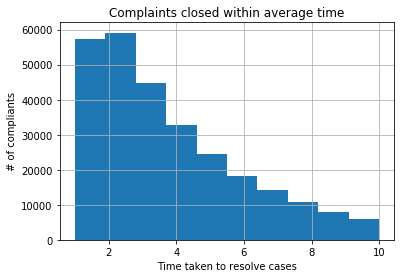

In [92]:
plot_data['Request_Closing_Hours'].hist(bins=10)
plt.xlabel('Time taken to resolve cases')
plt.ylabel('# of compliants')
plt.title('Complaints closed within average time')
plt.show()

Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)
Are the type of complaint or service requested and location related?

Hypothesis Testing:
    
    H0 : There is no effect of factors like type of complaint or  service requested and location in resolving the complaints
    
    H1 : There is an effect

In [59]:
from scipy import stats

In [60]:
from scipy.stats import f_oneway

In [ ]:
# to check the normal distribution

In [61]:
print(stats.shapiro(nyc.Request_Closing_Hours))

(0.5102815628051758, 0.0)


C:\Users\HOME\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# P - Value is 0.51

In [71]:
count=pd.crosstab(nyc['Complaint Type'], nyc['Complaint Type']).max().sort_values(ascending=False)

In [72]:
count

Complaint Type
Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
dtype: int64

In [73]:
print(stats.shapiro(count))

(0.6021366119384766, 6.526526590278081e-07)


In [ ]:
# p value is 0.60

In [ ]:
# to determine whether there are any statistical differences between Complaint types and Time taken to resolve

In [80]:
nyc['Complaint_type']=nyc['Complaint Type'].copy()

In [82]:
nyc['Complaint_type']

0         Noise - Street/Sidewalk
1                Blocked Driveway
2                Blocked Driveway
3                 Illegal Parking
4                 Illegal Parking
                   ...           
300693         Noise - Commercial
300694           Blocked Driveway
300695         Noise - Commercial
300696         Noise - Commercial
300697         Noise - Commercial
Name: Complaint_type, Length: 300698, dtype: object

In [83]:
stat,p = f_oneway(nyc.Request_Closing_Hours, nyc.Complaint_type.value_counts())

In [84]:
print(stat,p)

92573.57280767313 0.0


In [ ]:
# to check complaint type and location are realted

In [86]:
Data=pd.crosstab(nyc['Complaint_type'],nyc['Location'])

In [89]:
from scipy.stats import chi2_contingency

In [90]:
stat,p,dof,expected = chi2_contingency(Data)

In [91]:
print(stat,p)

4167451.193668138 0.0


There it is proven that there is no effect of factors like type of complaint or  service requested and location in resolving the complaints
    
    ## H0 : The Null Hypothesis is considered